# Notebook for generating plots of trained agents

This code will load the results for the specified experiments, generate plots, and save them in the `experiments_dir` directory

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import json
import pandas as pd

In [2]:
plt.rc("font", family="serif")
plt.rc("xtick", labelsize="small")
plt.rc("ytick", labelsize="small")
plt.rc("legend", fontsize="small")
plt.rc("axes", labelsize="small")

* Set the directory in which all the experiments to be plotted together are stored.
* Set the list of subdirs (experiments) you want to include in the plots

In [6]:
!ls $SCRATCH/elias_expe/2_agents/all/modified_reward/3_landmarks_reward2



centralized  independent  naming_game_30msg


ls: cannot access '/gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/centralized/all/modified_reward/6_landmarks/naming_game': No such file or directory


In [9]:
!ls $SCRATCH/elias_expe/2_agents/cooperative/modified_reward/6_landmarks

25align      independent		naming_game_30msg_alpha05_temp15
50align      naming_game		naming_game_30msg_t30_a10
75align      naming_game_20msg_t30_a10
centralized  naming_game_2_steps


In [10]:


experiments_dir = os.environ["SCRATCH"]+"/elias_expe/2_agents/cooperative/modified_reward/6_landmarks/"
list_of_experiments = ["centralized","independent","50align","naming_game_30msg_t30_a10","naming_game_30msg_alpha05_temp15"]

In [30]:


experiments_dir = os.environ["SCRATCH"]+"/elias_expe/2_agents/cooperative/modified_reward/6_landmarks/"
list_of_experiments = ["centralized","independent","50align","naming_game_30msg_t30_a10"]

In [15]:
!ls $SCRATCH/elias_expe/2_agents/cooperative/modified_reward/3_landmarks

25align      independent		       naming_game_30msg_t30_a10
50align      naming_game_30msg_alpha05_temp15  naming_game_9msg_t30_a10
75align      naming_game_30msg_alpha05_temp30  naming_game_t15_a10
centralized  naming_game_30msg_alpha10_temp30  naming_game_t30_a10


In [16]:


experiments_dir = os.environ["SCRATCH"]+"/elias_expe/2_agents/cooperative/modified_reward/3_landmarks/"
list_of_experiments = ["centralized","independent","50align","naming_game_30msg_t30_a10","naming_game_30msg_alpha05_temp15","naming_game_30msg_alpha05_temp30","naming_game_30msg_alpha10_temp30"]

In [37]:


experiments_dir = os.environ["SCRATCH"]+"/elias_expe/2_agents/cooperative/modified_reward/3_landmarks/"
list_of_experiments = ["centralized","independent","50align","naming_game_30msg_alpha10_temp30"]

In [20]:
!ls $SCRATCH/elias_expe/2_agents/all/modified_reward/3_landmarks

50align      naming_game_30msg_alpha05_temp15
centralized  naming_game_30msg_alpha05_temp30
independent  naming_game_30msg_alpha10_temp30b


In [21]:


experiments_dir = os.environ["SCRATCH"]+"/elias_expe/2_agents/all/modified_reward/3_landmarks/"
list_of_experiments = ["centralized","independent","50align","naming_game_30msg_alpha05_temp15","naming_game_30msg_alpha05_temp30","naming_game_30msg_alpha10_temp30b"]

In [43]:


experiments_dir = os.environ["SCRATCH"]+"/elias_expe/2_agents/all/modified_reward/3_landmarks/"
list_of_experiments = ["centralized","independent","50align","naming_game_30msg_alpha10_temp30b"]

In [25]:
!ls $SCRATCH/elias_expe/2_agents/all/modified_reward/6_landmarks

50align				  naming_game_30msg_alpha05_temp30
centralized			  naming_game_30msg_alpha05_temp30b
independent			  naming_game_30msg_alpha10_temp30b
naming_game_30msg_alpha05_temp15


In [51]:


experiments_dir = os.environ["SCRATCH"]+"/elias_expe/2_agents/all/modified_reward/6_landmarks/"
list_of_experiments = ["centralized","independent","50align","naming_game_30msg_alpha05_temp30","naming_game_30msg_alpha05_temp15","naming_game_30msg_alpha05_temp30b","naming_game_30msg_alpha10_temp30b"]

In [68]:


experiments_dir = os.environ["SCRATCH"]+"/elias_expe/2_agents/all/modified_reward/6_landmarks/"
list_of_experiments = ["centralized","independent","50align","naming_game_30msg_alpha10_temp30b"]

In [73]:
!ls $SCRATCH/elias_expe/2_agents/all/modified_reward/3_landmarks

50align      naming_game_30msg_alpha05_temp15
centralized  naming_game_30msg_alpha05_temp30
independent  naming_game_30msg_alpha10_temp30b


In [101]:


experiments_dir = os.environ["SCRATCH"]+"/elias_expe/2_agents/all/modified_reward/3_landmarks/"
list_of_experiments = ["centralized","naming_game_30msg_alpha05_temp15","naming_game_30msg_alpha10_temp30b"]

In [104]:


experiments_dir = os.environ["SCRATCH"]+"/elias_expe/2_agents/all/modified_reward/3_landmarks_reward2/"
list_of_experiments = ["centralized","naming_game_30msg"]

In [107]:


experiments_dir = os.environ["SCRATCH"]+"/elias_expe/2_agents/all/modified_reward/3_landmarks_reward8/"
list_of_experiments = ["centralized","naming_game_30msg"]

In [97]:


experiments_dir = os.environ["SCRATCH"]+"/elias_expe/2_agents/all/modified_reward/3_landmarks_reward4_nodec/"
list_of_experiments = ["naming_game_30msg"]

In [108]:
results = {}
for experiment in list_of_experiments:
    subdir = os.path.join(experiments_dir, experiment)
    eval_reward = pd.DataFrame()
    train_reward = pd.DataFrame()
    episode_len = pd.DataFrame()
    alignment = pd.DataFrame()
    train_x = []
    eval_x = []
    ctr=0
    for j, experiment_name in enumerate(os.listdir(subdir)):
        
        #print(subdir+"/"+experiment_name)
        if(os.path.isdir(subdir+"/"+experiment_name)):
          
            ctr+=1
            if(experiment_name[:5]!="p_est" and experiment_name[:5]!="0_5di"):
            
                if( (experiment_name[9]=="5" ) or experiment!="naming_game"):
                    print(experiment_name)

                    r = []
                    r_t = []
                    l = []
                    x_ = []
                    a = []
                    y_ = []
                    result_raw = open(os.path.join(subdir, experiment_name, "result.json"), "r")

                    for result in result_raw:
                        dump = json.loads(result)
                        #if(ctr==5):
                        #    print(dump["custom_metrics"].keys())
                        a.append(dump["custom_metrics"].get("goal_alignment_mean"))
                        y_.append(dump["timesteps_total"])
                        r_t.append(dump["episode_reward_mean"])

                        metrics = dump.get("evaluation")
                        if metrics is not None:
                            custom = metrics.get("custom_metrics")
                            x_.append(dump["timesteps_total"])
                            r.append(metrics["episode_reward_mean"])
                            l.append(metrics["episode_len_mean"])

                    eval_reward = pd.concat(
                        [eval_reward, pd.DataFrame(r)], ignore_index=True, axis=1
                    )
                    episode_len = pd.concat(
                        [episode_len, pd.DataFrame(l)], ignore_index=True, axis=1
                    )
                    alignment = pd.concat([alignment, pd.DataFrame(a)], ignore_index=True, axis=1)
                    train_reward = pd.concat(
                        [train_reward, pd.DataFrame(r_t)], ignore_index=True, axis=1
                    )


                    if len(x_) > len(eval_x):
                        eval_x = x_
                    if len(y_) > len(train_x):
                        train_x = y_
    results[experiment] = {
        "eval_reward": eval_reward,
        "train_reward": train_reward,
        "episode_len": episode_len,
        "alignment": alignment,
        "train_x": train_x,
        "eval_x": eval_x,
    }

2022-10-25_17-55-05rv91_02b
2022-10-25_17-54-53dcmpec4x
2022-10-25_17-55-05ukuo6f44
2022-10-25_17-55-05gr8afb9x
2022-10-25_17-55-05n4wuupiu
2022-10-25_16-24-47jfsgdat2
2022-10-25_16-24-47q01dg5_z
2022-10-25_16-24-47is8svqoq
2022-10-25_16-24-477uio6exy
2022-10-25_16-24-47y8tidp7h


In [6]:
main="naming_game_30msg"

Training plots

NameError: name 'main' is not defined

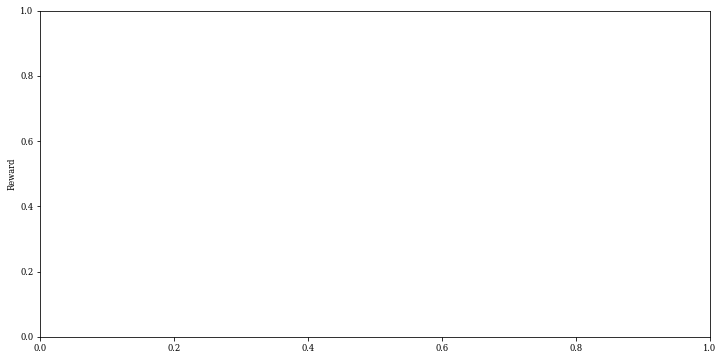

In [5]:
plt.figure(figsize=(12, 6))
plt.ylabel("Reward")
slice=1000

i = 1
n_exp = len(results)


        
for label, result in results.items():
    if( label!=main):
        plt.subplot(121)
        plt.plot( result["train_reward"][:slice].mean(axis=1), label=label)
        plt.fill_between(
            result["train_reward"][:slice].mean(axis=1) - result["train_reward"][:slice].std(axis=1),
            result["train_reward"][:slice].mean(axis=1) + result["train_reward"][:slice].std(axis=1),
            alpha=0.4,
        )
        if i == n_exp:
            plt.legend()
            plt.grid()
            plt.xlabel("Timesteps")
            plt.ylabel("Rewards")

        plt.subplot(122)
        plt.plot( result["alignment"][:slice].mean(axis=1), label=label)
        plt.fill_between(
            result["alignment"].mean(axis=1) - result["alignment"].std(axis=1),
            result["alignment"].mean(axis=1) + result["alignment"].std(axis=1),
            alpha=0.4,
        )
        if i == n_exp:
            plt.legend()
            plt.grid()
            plt.xlabel("Timesteps")
            plt.ylabel("Alignment")
        i += 1
for label, result in results.items():
    if( label==main):
        plt.subplot(121)
        plt.plot( result["train_reward"][:slice],alpha=0.4,label=label)
   
        if i == n_exp:
            plt.legend()
            plt.grid()
            plt.xlabel("Timesteps")
            plt.ylabel("Rewards")

        plt.subplot(122)
        plt.plot( result["alignment"][:slice],alpha=0.4)

        if i == n_exp:
            plt.legend()
            plt.grid()
            plt.xlabel("Timesteps")
            plt.ylabel("Alignment")
        i += 1


plt.tight_layout()
# Uncomment this line for saving the plot
# plt.savefig(os.path.join(experiments_dir, "train_plot.png"), dpi=300, bbox_inches='tight', transparent=True)

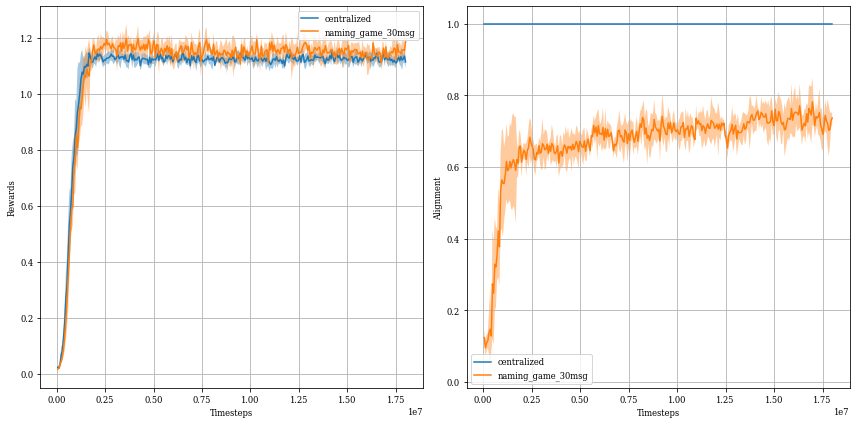

In [109]:
plt.figure(figsize=(12, 6))
plt.ylabel("Reward")
slice=1000

i = 1
n_exp = len(results)
for label, result in results.items():
    
    plt.subplot(121)
    plt.plot(result["train_x"][:slice], result["train_reward"][:slice].mean(axis=1), label=label)
    plt.fill_between(
        result["train_x"][:slice],
        result["train_reward"][:slice].mean(axis=1) - result["train_reward"][:slice].std(axis=1),
        result["train_reward"][:slice].mean(axis=1) + result["train_reward"][:slice].std(axis=1),
        alpha=0.4,
    )
    if i == n_exp:
        plt.legend()
        plt.grid()
        plt.xlabel("Timesteps")
        plt.ylabel("Rewards")

    plt.subplot(122)
    plt.plot(result["train_x"][:slice], result["alignment"][:slice].mean(axis=1), label=label)
    plt.fill_between(
        result["train_x"][:slice],
        result["alignment"][:slice].mean(axis=1) - result["alignment"][:slice].std(axis=1),
        result["alignment"][:slice].mean(axis=1) + result["alignment"][:slice].std(axis=1),
        alpha=0.4,
    )
    if i == n_exp:
        plt.legend()
        plt.grid()
        plt.xlabel("Timesteps")
        plt.ylabel("Alignment")
    i += 1

plt.tight_layout()
# Uncomment this line for saving the plot
# plt.savefig(os.path.join(experiments_dir, "train_plot.png"), dpi=300, bbox_inches='tight', transparent=True)

Eval plots

In [ ]:
plt.figure(figsize=(12, 6))
plt.ylabel("Reward")

slice=100
i = 1
n_exp = len(results)

        
for label, result in results.items():
    if(label!=main):
        plt.subplot(121)
        plt.plot( result["eval_reward"][:slice].mean(axis=1), label=label)
     
        if i == n_exp:
            plt.legend()
            plt.grid()
            plt.xlabel("Timesteps")
            plt.ylabel("Eval Rewards")

        plt.subplot(122)
        plt.plot( result["episode_len"][:slice].mean(axis=1), label=label)

        if i == n_exp:
            plt.legend()
            plt.grid()
            plt.xlabel("Timesteps")
            plt.ylabel("Episode len")
        i += 1
for label, result in results.items():
    if(label==main):
        plt.subplot(121)
        plt.plot( result["eval_reward"][:slice],alpha=0.4,label=label)

        if i == n_exp:
            plt.legend()
            plt.grid()
            plt.xlabel("Timesteps")
            plt.ylabel("Rewards")

        plt.subplot(122)
        plt.plot( result["episode_len"][:slice],alpha=0.4,label=label)

        if i == n_exp:
            plt.legend()
            plt.grid()
            plt.xlabel("Timesteps")
            plt.ylabel("Alignment")
        i += 1


plt.tight_layout()
# Uncomment this line for saving the plot
# plt.savefig(os.path.join(experiments_dir, "train_plot.png"), dpi=300, bbox_inches='tight', transparent=True)

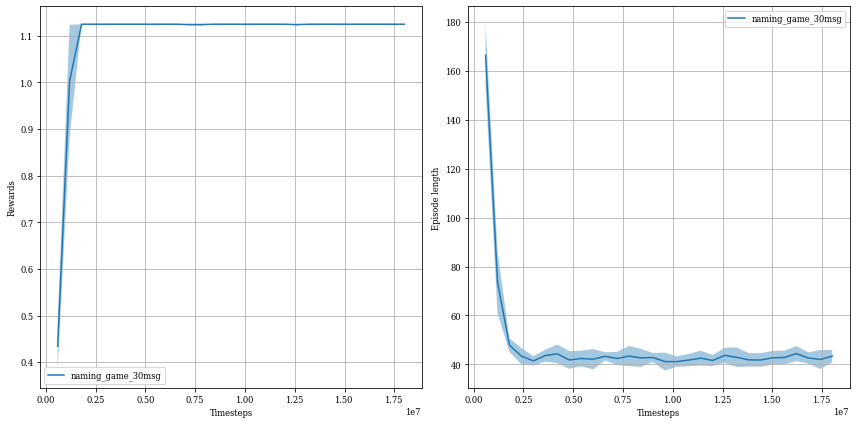

In [100]:
plt.figure(figsize=(12, 6))
slice=100
i = 1
n_exp = len(results)
for label, result in results.items():
    plt.subplot(121)
    plt.plot(result["eval_x"][:slice], result["eval_reward"][:slice].mean(axis=1), label=label)
    plt.fill_between(
        result["eval_x"][:slice],
        result["eval_reward"][:slice].mean(axis=1) - result["eval_reward"][:slice].std(axis=1),
        result["eval_reward"][:slice].mean(axis=1) + result["eval_reward"][:slice].std(axis=1),
        alpha=0.4,
    )
    if i == n_exp:
        plt.legend()
        plt.grid()
        plt.xlabel("Timesteps")
        plt.ylabel("Rewards")

    plt.subplot(122)
    plt.plot(result["eval_x"][:slice], result["episode_len"][:slice].mean(axis=1), label=label)
    plt.fill_between(
        result["eval_x"][:slice],
        result["episode_len"][:slice].mean(axis=1) - result["episode_len"][:slice].std(axis=1),
        result["episode_len"][:slice].mean(axis=1) + result["episode_len"][:slice].std(axis=1),
        alpha=0.4,
    )
    if i == n_exp:
        plt.legend()
        plt.grid()
        plt.xlabel("Timesteps")
        plt.ylabel("Episode length")
    i += 1

plt.tight_layout()
# Uncomment this line for saving the plot
# plt.savefig(os.path.join(experiments_dir, "evaluation_plot.png"), dpi=300, bbox_inches='tight', transparent=True)

# reward for collective 

In [159]:

subdir=os.environ["SCRATCH"]+"/elias_expe/2_agents/all/modified_reward/3_landmarks/naming_game_30msg_alpha05_temp15"
for j, experiment_name in enumerate(os.listdir(subdir)):
    if(os.path.isdir(subdir+"/"+experiment_name)):
        result_raw = open(os.path.join(subdir, experiment_name, "result.json"), "r")

for result in result_raw:
    dump = json.loads(result)
print(dump["custom_metrics"].keys())

dict_keys(['reward for goal 011_mean', 'reward for goal 011_min', 'reward for goal 011_max', 'goal_alignment_mean', 'goal_alignment_min', 'goal_alignment_max', 'reward for collective goal_mean', 'reward for collective goal_min', 'reward for collective goal_max', 'reward for goal 101_mean', 'reward for goal 101_min', 'reward for goal 101_max', 'reward for goal 110_mean', 'reward for goal 110_min', 'reward for goal 110_max', 'reward for goal 100_mean', 'reward for goal 100_min', 'reward for goal 100_max', 'reward for individual goal_mean', 'reward for individual goal_min', 'reward for individual goal_max', 'reward for goal 010_mean', 'reward for goal 010_min', 'reward for goal 010_max', 'reward for goal 001_mean', 'reward for goal 001_min', 'reward for goal 001_max'])


In [160]:
print(dump["evaluation"]["custom_metrics"].keys())

dict_keys(['reward for goal 001_mean', 'reward for goal 001_min', 'reward for goal 001_max', 'reward for individual goal_mean', 'reward for individual goal_min', 'reward for individual goal_max', 'reward for goal 010_mean', 'reward for goal 010_min', 'reward for goal 010_max', 'reward for goal 100_mean', 'reward for goal 100_min', 'reward for goal 100_max', 'reward for goal 011_mean', 'reward for goal 011_min', 'reward for goal 011_max', 'goal_alignment_mean', 'goal_alignment_min', 'goal_alignment_max', 'reward for collective goal_mean', 'reward for collective goal_min', 'reward for collective goal_max', 'reward for goal 101_mean', 'reward for goal 101_min', 'reward for goal 101_max', 'reward for goal 110_mean', 'reward for goal 110_min', 'reward for goal 110_max'])


In [161]:
results = {}
for experiment in list_of_experiments:
    subdir = os.path.join(experiments_dir, experiment)
    eval_reward = pd.DataFrame()
    train_reward = pd.DataFrame()
    episode_len = pd.DataFrame()
    alignment = pd.DataFrame()
    train_x = []
    eval_x = []
    ctr=0
    for j, experiment_name in enumerate(os.listdir(subdir)):
        
        #print(subdir+"/"+experiment_name)
        if(os.path.isdir(subdir+"/"+experiment_name)):
          
            ctr+=1
            if(experiment_name[:5]!="p_est" and experiment_name[:5]!="0_5di"):
            
                if( (experiment_name[9]=="5" ) or experiment!="naming_game"):
                    print(experiment_name)

                    r = []
                    r_t = []
                    l = []
                    x_ = []
                    a = []
                    y_ = []
                    result_raw = open(os.path.join(subdir, experiment_name, "result.json"), "r")

                    for result in result_raw:
                        dump = json.loads(result)
     
                        a.append(dump["custom_metrics"].get("goal_alignment_mean"))
                        y_.append(dump["timesteps_total"])
                        r_t.append(dump["custom_metrics"]["reward for collective goal_mean"])

                        metrics = dump.get("evaluation")
                        
                        if metrics is not None:
                            custom = metrics.get("custom_metrics")
                            x_.append(dump["timesteps_total"])
                            
                            r.append(custom["reward for collective goal_mean"])
                            l.append(metrics["episode_len_mean"])

                    eval_reward = pd.concat(
                        [eval_reward, pd.DataFrame(r)], ignore_index=True, axis=1
                    )
                    episode_len = pd.concat(
                        [episode_len, pd.DataFrame(l)], ignore_index=True, axis=1
                    )
                    alignment = pd.concat([alignment, pd.DataFrame(a)], ignore_index=True, axis=1)
                    train_reward = pd.concat(
                        [train_reward, pd.DataFrame(r_t)], ignore_index=True, axis=1
                    )


                    if len(x_) > len(eval_x):
                        eval_x = x_
                    if len(y_) > len(train_x):
                        train_x = y_
    results[experiment] = {
        "eval_reward": eval_reward,
        "train_reward": train_reward,
        "episode_len": episode_len,
        "alignment": alignment,
        "train_x": train_x,
        "eval_x": eval_x,
    }

2022-09-23_00-51-45mg47tdp3
2022-09-23_00-51-45yyne3mdd
2022-09-23_00-51-02xx5mt8q5
2022-09-23_00-51-456kidioiu
2022-09-23_00-51-45wg3nss14
2022-09-23_01-19-23dt2qqg_k
2022-09-23_01-18-59h32479po
2022-09-23_01-19-23p2ede0dc
2022-09-23_01-19-23koqpbuv1
2022-09-23_01-19-237fangql2
2022-10-18_15-24-518jizlj8s
2022-10-18_15-24-51q86c5x2j
2022-10-18_15-24-47hfgb30vh
2022-10-18_15-24-51t1gprz6m
2022-10-18_15-24-51zdvhuspn
2022-10-25_17-35-30v8lhn20g
2022-10-25_17-35-30i__uw27l
2022-10-25_17-35-30g23zkn63
2022-10-25_17-35-30modexswd
2022-10-25_17-35-309etklhyv
2022-10-18_14-46-06aa8sbiav
2022-10-18_14-50-446v826kky
2022-10-18_14-50-18tg_3by1p
2022-10-18_14-46-06ccy0q4se
2022-10-18_14-50-44grz3l_hx


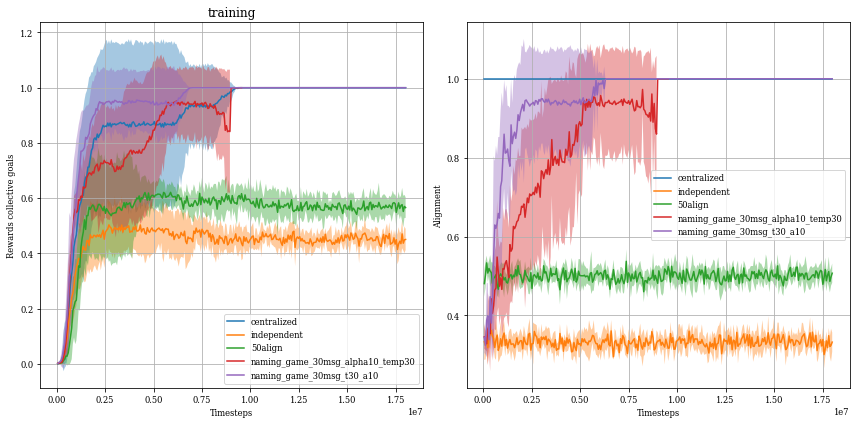

In [163]:
plt.figure(figsize=(12, 6))
plt.ylabel("Reward")
slice=1000

i = 1
n_exp = len(results)
for label, result in results.items():
    
    plt.subplot(121)
    plt.plot(result["train_x"][:slice], result["train_reward"][:slice].mean(axis=1), label=label)
    plt.fill_between(
        result["train_x"][:slice],
        result["train_reward"][:slice].mean(axis=1) - result["train_reward"][:slice].std(axis=1),
        result["train_reward"][:slice].mean(axis=1) + result["train_reward"][:slice].std(axis=1),
        alpha=0.4,
    )
    if i == n_exp:
        plt.legend()
        plt.grid()
        plt.xlabel("Timesteps")
        plt.ylabel("Rewards collective goals")
        plt.title("training")

    plt.subplot(122)
    plt.plot(result["train_x"][:slice], result["alignment"][:slice].mean(axis=1), label=label)
    plt.fill_between(
        result["train_x"][:slice],
        result["alignment"][:slice].mean(axis=1) - result["alignment"][:slice].std(axis=1),
        result["alignment"][:slice].mean(axis=1) + result["alignment"][:slice].std(axis=1),
        alpha=0.4,
    )
    if i == n_exp:
        plt.legend()
        plt.grid()
        plt.xlabel("Timesteps")
        plt.ylabel("Alignment")
    i += 1

plt.tight_layout()
# Uncomment this line for saving the plot
# plt.savefig(os.path.join(experiments_dir, "train_plot.png"), dpi=300, bbox_inches='tight', transparent=True)

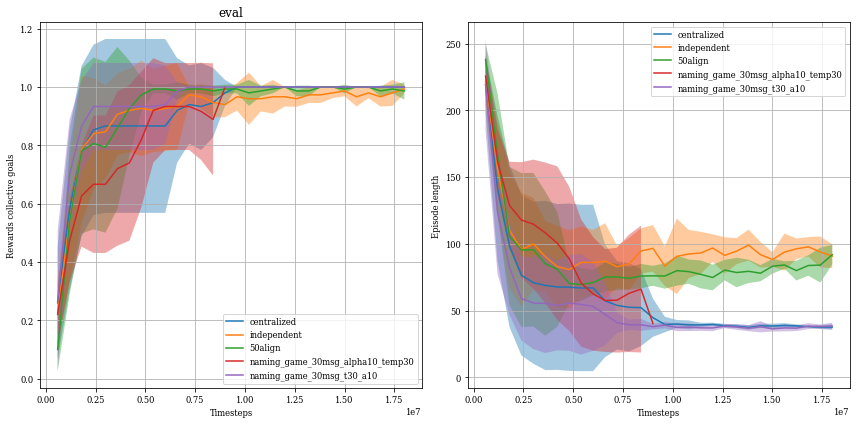

In [164]:
plt.figure(figsize=(12, 6))
slice=100
i = 1
n_exp = len(results)
for label, result in results.items():
    plt.subplot(121)
    plt.plot(result["eval_x"][:slice], result["eval_reward"][:slice].mean(axis=1), label=label)
    plt.fill_between(
        result["eval_x"][:slice],
        result["eval_reward"][:slice].mean(axis=1) - result["eval_reward"][:slice].std(axis=1),
        result["eval_reward"][:slice].mean(axis=1) + result["eval_reward"][:slice].std(axis=1),
        alpha=0.4,
    )
    if i == n_exp:
        plt.legend()
        plt.grid()
        plt.xlabel("Timesteps")
        plt.ylabel("Rewards")
        plt.ylabel("Rewards collective goals")
        plt.title("eval")

    plt.subplot(122)
    plt.plot(result["eval_x"][:slice], result["episode_len"][:slice].mean(axis=1), label=label)
    plt.fill_between(
        result["eval_x"][:slice],
        result["episode_len"][:slice].mean(axis=1) - result["episode_len"][:slice].std(axis=1),
        result["episode_len"][:slice].mean(axis=1) + result["episode_len"][:slice].std(axis=1),
        alpha=0.4,
    )
    if i == n_exp:
        plt.legend()
        plt.grid()
        plt.xlabel("Timesteps")
        plt.ylabel("Episode length")
    i += 1

plt.tight_layout()
# Uncomment this line for saving the plot
# plt.savefig(os.path.join(experiments_dir, "evaluation_plot.png"), dpi=300, bbox_inches='tight', transparent=True)

# reward for individual

In [165]:
results = {}
for experiment in list_of_experiments:
    subdir = os.path.join(experiments_dir, experiment)
    eval_reward = pd.DataFrame()
    train_reward = pd.DataFrame()
    episode_len = pd.DataFrame()
    alignment = pd.DataFrame()
    train_x = []
    eval_x = []
    ctr=0
    for j, experiment_name in enumerate(os.listdir(subdir)):
        
        #print(subdir+"/"+experiment_name)
        if(os.path.isdir(subdir+"/"+experiment_name)):
          
            ctr+=1
            if(experiment_name[:5]!="p_est" and experiment_name[:5]!="0_5di"):
            
                if( (experiment_name[9]=="5" ) or experiment!="naming_game"):
                    print(experiment_name)

                    r = []
                    r_t = []
                    l = []
                    x_ = []
                    a = []
                    y_ = []
                    result_raw = open(os.path.join(subdir, experiment_name, "result.json"), "r")

                    for result in result_raw:
                        dump = json.loads(result)
     
                        a.append(dump["custom_metrics"].get("goal_alignment_mean"))
                        y_.append(dump["timesteps_total"])
                        r_t.append(dump["custom_metrics"]["reward for individual goal_mean"])

                        metrics = dump.get("evaluation")
                        
                        if metrics is not None:
                            custom = metrics.get("custom_metrics")
                            x_.append(dump["timesteps_total"])
                            
                            r.append(custom["reward for individual goal_mean"])
                            l.append(metrics["episode_len_mean"])

                    eval_reward = pd.concat(
                        [eval_reward, pd.DataFrame(r)], ignore_index=True, axis=1
                    )
                    episode_len = pd.concat(
                        [episode_len, pd.DataFrame(l)], ignore_index=True, axis=1
                    )
                    alignment = pd.concat([alignment, pd.DataFrame(a)], ignore_index=True, axis=1)
                    train_reward = pd.concat(
                        [train_reward, pd.DataFrame(r_t)], ignore_index=True, axis=1
                    )


                    if len(x_) > len(eval_x):
                        eval_x = x_
                    if len(y_) > len(train_x):
                        train_x = y_
    results[experiment] = {
        "eval_reward": eval_reward,
        "train_reward": train_reward,
        "episode_len": episode_len,
        "alignment": alignment,
        "train_x": train_x,
        "eval_x": eval_x,
    }

2022-09-23_00-51-45mg47tdp3


KeyError: 'reward for individual goal_mean'

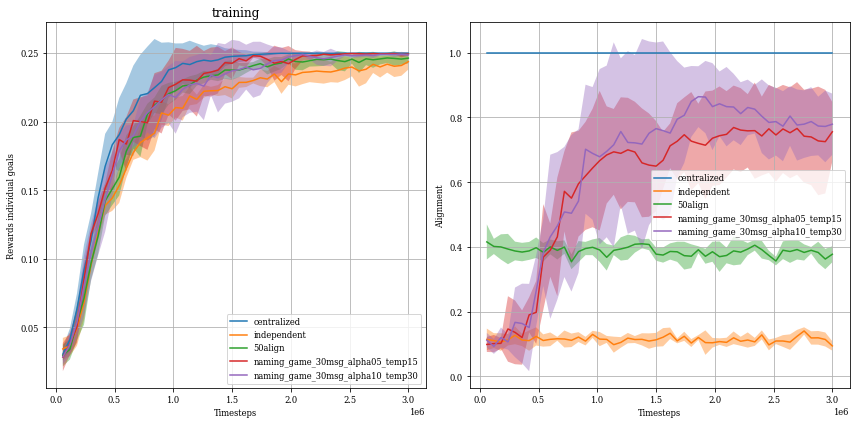

In [146]:
plt.figure(figsize=(12, 6))
plt.ylabel("Reward")
slice=50

i = 1
n_exp = len(results)
for label, result in results.items():
    
    plt.subplot(121)
    plt.plot(result["train_x"][:slice], result["train_reward"][:slice].mean(axis=1), label=label)
    plt.fill_between(
        result["train_x"][:slice],
        result["train_reward"][:slice].mean(axis=1) - result["train_reward"][:slice].std(axis=1),
        result["train_reward"][:slice].mean(axis=1) + result["train_reward"][:slice].std(axis=1),
        alpha=0.4,
    )
    if i == n_exp:
        plt.legend()
        plt.grid()
        plt.xlabel("Timesteps")
        plt.ylabel("Rewards individual goals")
        plt.title("training")

    plt.subplot(122)
    plt.plot(result["train_x"][:slice], result["alignment"][:slice].mean(axis=1), label=label)
    plt.fill_between(
        result["train_x"][:slice],
        result["alignment"][:slice].mean(axis=1) - result["alignment"][:slice].std(axis=1),
        result["alignment"][:slice].mean(axis=1) + result["alignment"][:slice].std(axis=1),
        alpha=0.4,
    )
    if i == n_exp:
        plt.legend()
        plt.grid()
        plt.xlabel("Timesteps")
        plt.ylabel("Alignment")
    i += 1

plt.tight_layout()
# Uncomment this line for saving the plot
# plt.savefig(os.path.join(experiments_dir, "train_plot.png"), dpi=300, bbox_inches='tight', transparent=True)

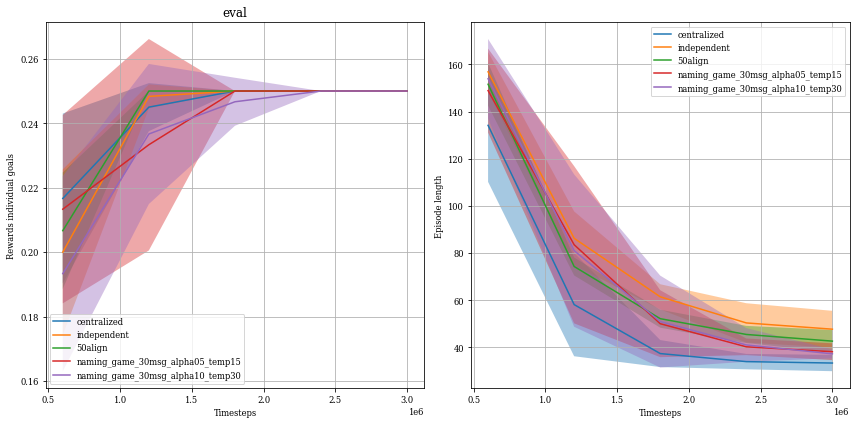

In [142]:
plt.figure(figsize=(12, 6))
slice=5
i = 1
n_exp = len(results)
for label, result in results.items():
    plt.subplot(121)
    plt.plot(result["eval_x"][:slice], result["eval_reward"][:slice].mean(axis=1), label=label)
    plt.fill_between(
        result["eval_x"][:slice],
        result["eval_reward"][:slice].mean(axis=1) - result["eval_reward"][:slice].std(axis=1),
        result["eval_reward"][:slice].mean(axis=1) + result["eval_reward"][:slice].std(axis=1),
        alpha=0.4,
    )
    if i == n_exp:
        plt.legend()
        plt.grid()
        plt.xlabel("Timesteps")
        plt.ylabel("Rewards individual goals")
        plt.title("eval")

    plt.subplot(122)
    plt.plot(result["eval_x"][:slice], result["episode_len"][:slice].mean(axis=1), label=label)
    plt.fill_between(
        result["eval_x"][:slice],
        result["episode_len"][:slice].mean(axis=1) - result["episode_len"][:slice].std(axis=1),
        result["episode_len"][:slice].mean(axis=1) + result["episode_len"][:slice].std(axis=1),
        alpha=0.4,
    )
    if i == n_exp:
        plt.legend()
        plt.grid()
        plt.xlabel("Timesteps")
        plt.ylabel("Episode length")
    i += 1

plt.tight_layout()
# Uncomment this line for saving the plot
# plt.savefig(os.path.join(experiments_dir, "evaluation_plot.png"), dpi=300, bbox_inches='tight', transparent=True)

# reward for specific goal

In [103]:
goal="001"



In [110]:
results = {}
for experiment in list_of_experiments:
    subdir = os.path.join(experiments_dir, experiment)
    eval_reward = pd.DataFrame()
    train_reward = pd.DataFrame()
    episode_len = pd.DataFrame()
    alignment = pd.DataFrame()
    train_x = []
    eval_x = []
    ctr=0
    for j, experiment_name in enumerate(os.listdir(subdir)):
        
        #print(subdir+"/"+experiment_name)
        if(os.path.isdir(subdir+"/"+experiment_name)):
          
            ctr+=1
            if(experiment_name[:5]!="p_est" and experiment_name[:5]!="0_5di"):
            
                if( (experiment_name[9]=="5" ) or experiment!="naming_game"):
                    print(experiment_name)

                    r = []
                    r_t = []
                    l = []
                    x_ = []
                    a = []
                    y_ = []
                    result_raw = open(os.path.join(subdir, experiment_name, "result.json"), "r")

                    for result in result_raw:
                        dump = json.loads(result)
     
                        a.append(dump["custom_metrics"].get("goal_alignment_mean"))
                        y_.append(dump["timesteps_total"])
                        r_t.append(dump["custom_metrics"]["reward for goal "+goal+"_mean"])

                        metrics = dump.get("evaluation")
                        
                        if metrics is not None:
                            custom = metrics.get("custom_metrics")
                            x_.append(dump["timesteps_total"])
                            
                            r.append(custom["reward for goal "+goal+"_mean"])
                            l.append(metrics["episode_len_mean"])

                    eval_reward = pd.concat(
                        [eval_reward, pd.DataFrame(r)], ignore_index=True, axis=1
                    )
                    episode_len = pd.concat(
                        [episode_len, pd.DataFrame(l)], ignore_index=True, axis=1
                    )
                    alignment = pd.concat([alignment, pd.DataFrame(a)], ignore_index=True, axis=1)
                    train_reward = pd.concat(
                        [train_reward, pd.DataFrame(r_t)], ignore_index=True, axis=1
                    )


                    if len(x_) > len(eval_x):
                        eval_x = x_
                    if len(y_) > len(train_x):
                        train_x = y_
    results[experiment] = {
        "eval_reward": eval_reward,
        "train_reward": train_reward,
        "episode_len": episode_len,
        "alignment": alignment,
        "train_x": train_x,
        "eval_x": eval_x,
    }

2022-10-25_17-55-05rv91_02b
2022-10-25_17-54-53dcmpec4x
2022-10-25_17-55-05ukuo6f44
2022-10-25_17-55-05gr8afb9x
2022-10-25_17-55-05n4wuupiu
2022-10-25_16-24-47jfsgdat2
2022-10-25_16-24-47q01dg5_z
2022-10-25_16-24-47is8svqoq
2022-10-25_16-24-477uio6exy
2022-10-25_16-24-47y8tidp7h


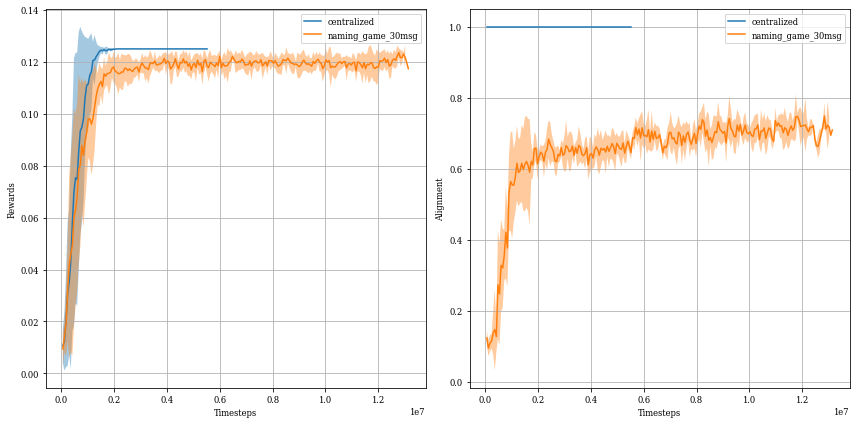

In [111]:
plt.figure(figsize=(12, 6))
plt.ylabel("Reward")
slice=1000

i = 1
n_exp = len(results)
for label, result in results.items():
    
    plt.subplot(121)
    plt.plot(result["train_x"][:slice], result["train_reward"][:slice].mean(axis=1), label=label)
    plt.fill_between(
        result["train_x"][:slice],
        result["train_reward"][:slice].mean(axis=1) - result["train_reward"][:slice].std(axis=1),
        result["train_reward"][:slice].mean(axis=1) + result["train_reward"][:slice].std(axis=1),
        alpha=0.4,
    )
    if i == n_exp:
        plt.legend()
        plt.grid()
        plt.xlabel("Timesteps")
        plt.ylabel("Rewards")

    plt.subplot(122)
    plt.plot(result["train_x"][:slice], result["alignment"][:slice].mean(axis=1), label=label)
    plt.fill_between(
        result["train_x"][:slice],
        result["alignment"][:slice].mean(axis=1) - result["alignment"][:slice].std(axis=1),
        result["alignment"][:slice].mean(axis=1) + result["alignment"][:slice].std(axis=1),
        alpha=0.4,
    )
    if i == n_exp:
        plt.legend()
        plt.grid()
        plt.xlabel("Timesteps")
        plt.ylabel("Alignment")
    i += 1

plt.tight_layout()
# Uncomment this line for saving the plot
# plt.savefig(os.path.join(experiments_dir, "train_plot.png"), dpi=300, bbox_inches='tight', transparent=True)

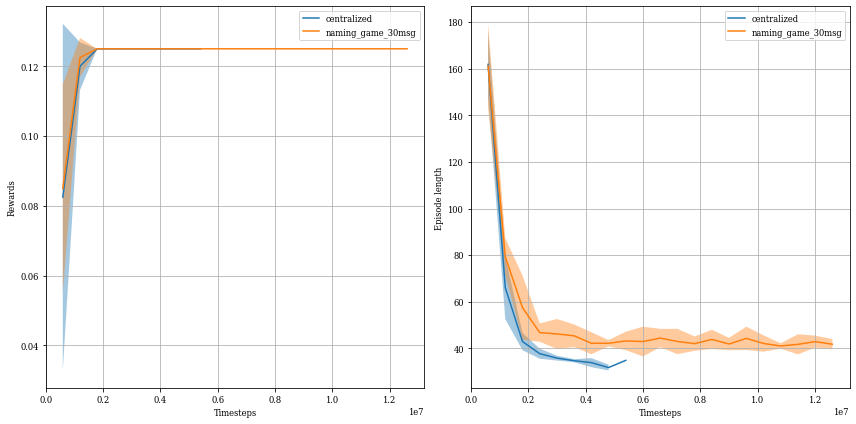

In [112]:
plt.figure(figsize=(12, 6))
slice=100
i = 1
n_exp = len(results)
for label, result in results.items():
    plt.subplot(121)
    plt.plot(result["eval_x"][:slice], result["eval_reward"][:slice].mean(axis=1), label=label)
    plt.fill_between(
        result["eval_x"][:slice],
        result["eval_reward"][:slice].mean(axis=1) - result["eval_reward"][:slice].std(axis=1),
        result["eval_reward"][:slice].mean(axis=1) + result["eval_reward"][:slice].std(axis=1),
        alpha=0.4,
    )
    if i == n_exp:
        plt.legend()
        plt.grid()
        plt.xlabel("Timesteps")
        plt.ylabel("Rewards")

    plt.subplot(122)
    plt.plot(result["eval_x"][:slice], result["episode_len"][:slice].mean(axis=1), label=label)
    plt.fill_between(
        result["eval_x"][:slice],
        result["episode_len"][:slice].mean(axis=1) - result["episode_len"][:slice].std(axis=1),
        result["episode_len"][:slice].mean(axis=1) + result["episode_len"][:slice].std(axis=1),
        alpha=0.4,
    )
    if i == n_exp:
        plt.legend()
        plt.grid()
        plt.xlabel("Timesteps")
        plt.ylabel("Episode length")
    i += 1

plt.tight_layout()
# Uncomment this line for saving the plot
# plt.savefig(os.path.join(experiments_dir, "evaluation_plot.png"), dpi=300, bbox_inches='tight', transparent=True)